In [1]:
import sys
sys.path.insert(0, '../src')

# Image

In [2]:
req = """
{
    "param": "test",
    "test": {
        "_type": "image/png",
        "_data": "iVBORw0KGgoAAAANSUhEUgAAABQAAAAKCAIAAAA7N+mxAAABhGlDQ1BJQ0MgcHJvZmlsZQAAKJF9kT1Iw0AcxV8/RJEWBTsUcchQnSyKijhqFYpQIdQKrTqYXPoFTRqSFBdHwbXg4Mdi1cHFWVcHV0EQ/ABxdnBSdJES/5cUWsR4cNyPd/ced+8Af6PCVDM4DqiaZaSTCSGbWxW6XxFEP8IYQ1Ripj4niil4jq97+Ph6F+dZ3uf+HGElbzLAJxDPMt2wiDeIpzctnfM+cYSVJIX4nHjUoAsSP3JddvmNc9FhP8+MGJn0PHGEWCh2sNzBrGSoxFPEMUXVKN+fdVnhvMVZrdRY6578haG8trLMdZpDSGIRSxAhQEYNZVRgIU6rRoqJNO0nPPyDjl8kl0yuMhg5FlCFCsnxg//B727NwuSEmxRKAF0vtv0xDHTvAs26bX8f23bzBAg8A1da219tADOfpNfbWuwI6NsGLq7bmrwHXO4A0SddMiRHCtD0FwrA+xl9Uw4YuAV619zeWvs4fQAy1FXqBjg4BEaKlL3u8e6ezt7+PdPq7wd4FXKp+2ddwwAAAAlwSFlzAAAuIwAALiMBeKU/dgAAAAd0SU1FB+gEEA0vNzEjzCEAAAAZdEVYdENvbW1lbnQAQ3JlYXRlZCB3aXRoIEdJTVBXgQ4XAAAANUlEQVQoz2P8JSvLAANsjx8zEAJw9WyPHzMxkAt+ycqSr5mBgWFUM6maiYlbfDazPX5MnhEAjMMMrG1D8NUAAAAASUVORK5CYII="
    }
}
"""

In [13]:
from aitoolbox_support_lib.sources import RESTSources
from base64 import b64decode
import imageio
import matplotlib.pyplot as plt

In [4]:
src = RESTSources(req)

AttributeError: 'str' object has no attribute 'headers'

In [10]:
src.get("param")

'test'

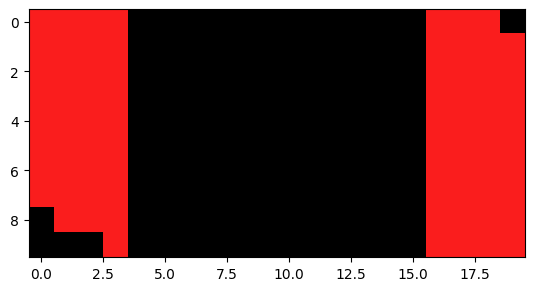

In [11]:
plt.imshow(src.get("test"))

# Numpy array

In [2]:
from aitoolbox_support_lib.destinations import RESTDestination
from aitoolbox_support_lib.datatypes.image import Image
import numpy as np

In [3]:
r = RESTDestination()
r.set('ndarray',np.array([4,5,6]))

In [4]:
r.get('ndarray')

array([4, 5, 6])

In [5]:
r.serialize()

'{"ndarray": [4, 5, 6]}'

In [6]:
r.set('img',Image(np.ones((12,12,3),dtype=np.uint8) * 255))

In [7]:
r.serialize()

'{"ndarray": [4, 5, 6], "img": {"_type": "image/png", "_data": "iVBORw0KGgoAAAANSUhEUgAAAAwAAAAMCAIAAADZF8uwAAAAF0lEQVR4nGP8//8/AyHARFDFqKIBUAQAP6kDFQZDzEYAAAAASUVORK5CYII="}}'

In [9]:
from base64 import b64encode,b64decode
import imageio.v3 as iio

In [15]:
data = iio.imwrite("<bytes>",np.ones((12,12,3),dtype=np.uint8) * 255, extension='.png')
b = b64encode(data)

In [16]:
data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x0c\x00\x00\x00\x0c\x08\x02\x00\x00\x00\xd9\x17\xcb\xb0\x00\x00\x00\x17IDATx\x9cc\xfc\xff\xff?\x03!\xc0DP\xc5\xa8\xa2\x01P\x04\x00?\xa9\x03\x15\x06C\xccF\x00\x00\x00\x00IEND\xaeB`\x82'

In [21]:
b.decode('utf-8')

'iVBORw0KGgoAAAANSUhEUgAAAAwAAAAMCAIAAADZF8uwAAAAF0lEQVR4nGP8//8/AyHARFDFqKIBUAQAP6kDFQZDzEYAAAAASUVORK5CYII='

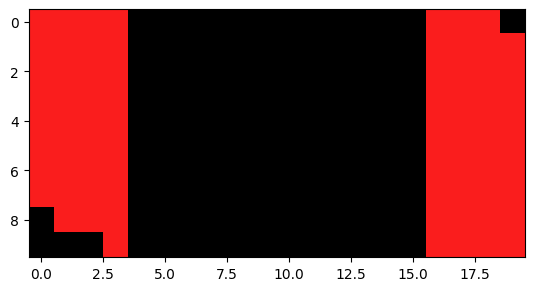

In [14]:
s = "iVBORw0KGgoAAAANSUhEUgAAABQAAAAKCAIAAAA7N+mxAAAANElEQVR4nGP8JSvLAANsjx8zEAJw9WyPHzMRVI3HFPI1MzAwjGomVTMxcYvPZrbHj8kzAgCMwwysH3K4DgAAAABJRU5ErkJggg=="
plt.imshow(iio.imread(b64decode(s)))
